In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import seaborn as sns


In [48]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


# Load the Boston House Pricing Dataset

In [35]:
df = pd.read_excel("Boston Dataset1.xlsx")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [37]:
df.rename(columns={'medv': 'price'}, inplace=True)

In [38]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
df.shape

(506, 14)

## Prepare the Dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [43]:
#Summarising the stats of the data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [45]:
# Check the missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [54]:
# # EDA: Exploratory Data Analysis
# #Correlation (Necessary in almost all regressioin problems)
# plt.figure(figsize=(25,25))
# sns.heatmap(df.corr(), annot=True)

## Analyse the Correlation featurs

In [53]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [61]:
# sns.pairplot(df)

Text(0, 0.5, 'Price')

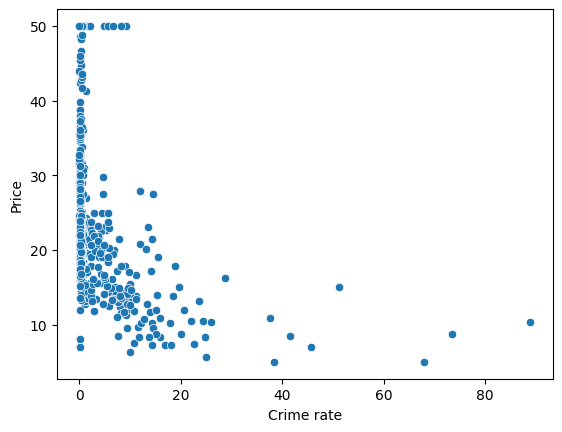

In [60]:
sns.scatterplot(x = df.crim, y=df.price,data=df)
plt.xlabel("Crime rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

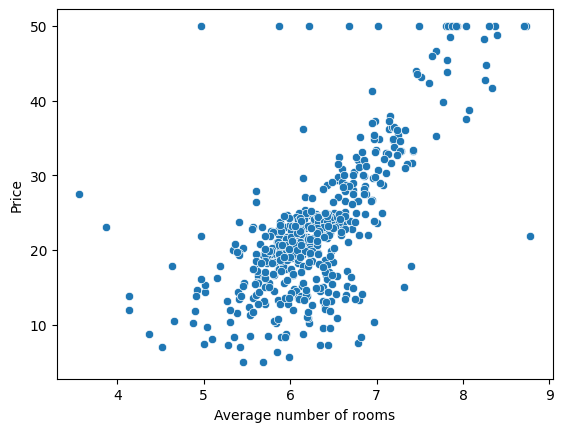

In [62]:
sns.scatterplot(x = df.rm, y=df.price,data=df)
plt.xlabel("Average number of rooms")
plt.ylabel("Price")

<Axes: xlabel='rm', ylabel='price'>

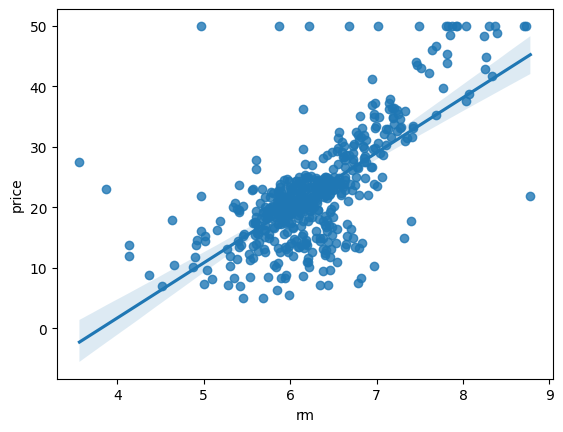

In [65]:
sns.regplot(x = 'rm', y='price',data=df)

Text(0, 0.5, 'Price')

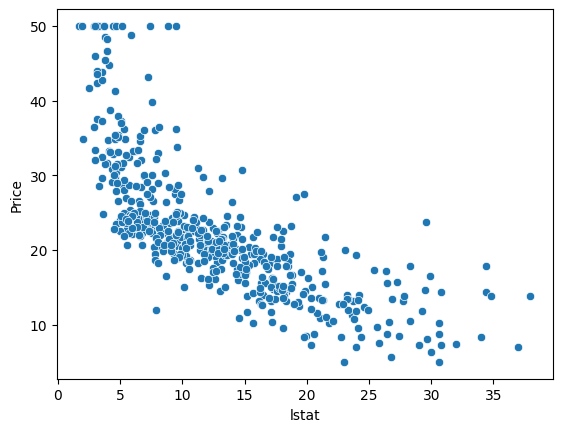

In [66]:
sns.scatterplot(x = df.lstat, y=df.price,data=df)
plt.xlabel("lstat")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

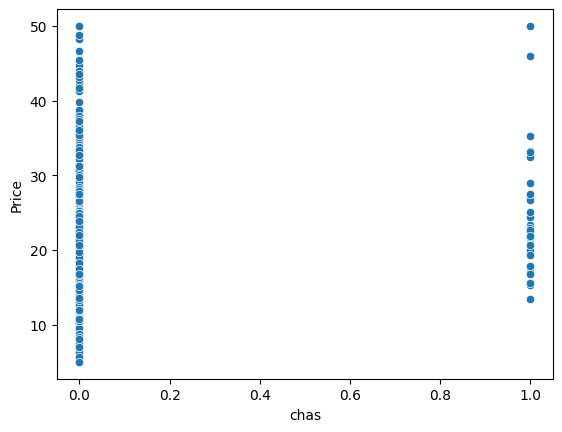

In [68]:
sns.scatterplot(x = df.chas, y=df.price,data=df)
plt.xlabel("chas")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

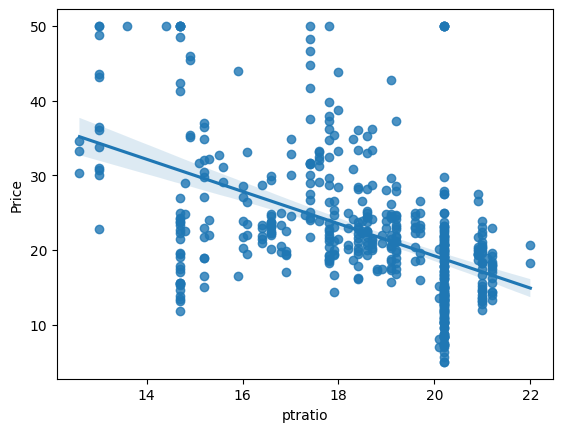

In [70]:
sns.regplot(x = 'ptratio', y='price',data=df)
plt.xlabel("ptratio")
plt.ylabel("Price")

## Dividing Features

In [298]:
x = df.drop(columns='price')
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [228]:
y = df.price
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [229]:
## Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30)

In [283]:
# Standardize the dateset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [284]:
xtrain = scaler.fit_transform(x_train)

In [285]:
xtest = scaler.transform(x_test)

In [305]:
xtrain

array([[-0.37370369, -0.49682193, -1.02092493, ..., -0.83872496,
         0.4415408 ,  0.30665733],
       [-0.38512385,  3.08743411, -1.1220695 , ..., -1.07163101,
         0.4415408 , -1.15122163],
       [ 0.51751496, -0.49682193,  1.06890053, ...,  0.83819862,
        -3.84992752,  0.63402536],
       ...,
       [ 0.63157499, -0.49682193,  1.06890053, ...,  0.83819862,
         0.10609939, -0.44410669],
       [-0.37846854,  1.29530609, -0.66989375, ..., -0.37291285,
         0.4415408 , -1.39711139],
       [ 0.35357992, -0.49682193,  1.06890053, ...,  0.83819862,
        -3.88461707,  0.70677381]])

In [304]:
xtest

array([[-0.38492043,  3.08743411, -1.39724225, ..., -2.70197337,
         0.39027008, -0.86750267],
       [-0.35692613, -0.49682193,  1.63263281, ...,  1.30401072,
         0.34532639,  1.68451299],
       [-0.37257826,  0.62325808, -0.86028354, ...,  0.60529256,
         0.42201429,  0.0825921 ],
       ...,
       [ 3.8508313 , -0.49682193,  1.06890053, ...,  0.83819862,
         0.4415408 ,  2.62005807],
       [-0.38308856, -0.49682193, -1.02092493, ..., -0.83872496,
         0.42735954, -0.91551665],
       [ 1.18477256, -0.49682193,  1.06890053, ...,  0.83819862,
         0.4415408 ,  1.12580488]])

## Model Training

In [235]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,y_train)
lr.intercept_, lr.coef_

(22.545762711864406,
 array([-1.09737913,  1.03293349,  0.24754542,  0.37664341, -2.03608405,
         2.87868695,  0.06732067, -2.92325403,  3.00649221, -2.23600462,
        -2.18378264,  1.00475323, -3.43078049]))

In [236]:
#On which parameters the model has been trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [237]:
ypred =lr.predict(xtest)

In [238]:
y_test

198    34.6
140    14.0
60     18.7
476    16.7
475    13.3
       ... 
364    21.9
424    11.7
398     5.0
177    24.6
401     7.2
Name: price, Length: 152, dtype: float64

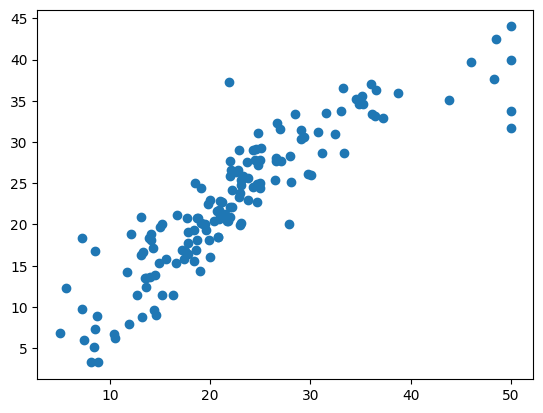

In [239]:
##plot a scatterlot for predictions
plt.scatter( y_test, ypred)

In [240]:
residuals =  y_test-ypred
residuals

198    -0.572816
140     0.315118
60      0.615031
476    -4.498779
475    -3.337902
         ...    
364   -15.354223
424    -2.533669
398    -1.784110
177    -4.505214
401   -11.147424
Name: price, Length: 152, dtype: float64

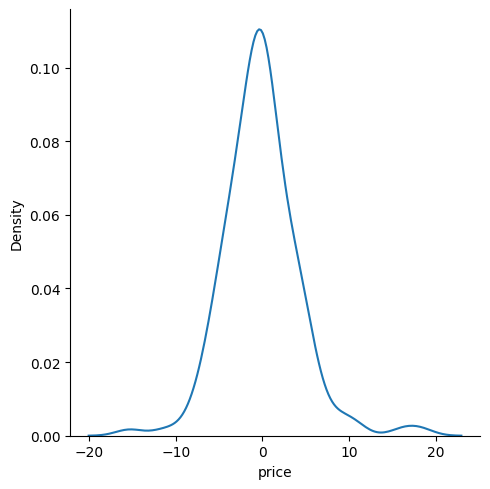

In [241]:
##Plot the residuals
sns.displot(residuals, kind="kde")

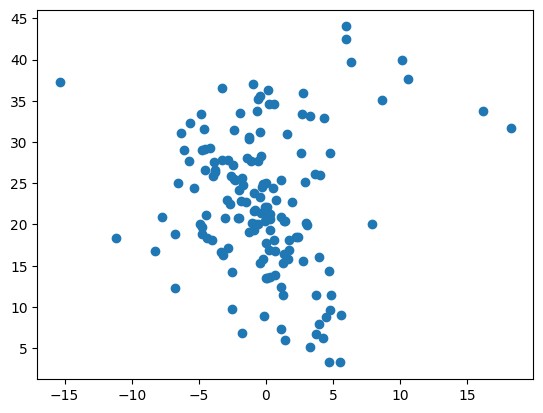

In [242]:
##scatter plot between predictions and residuals
plt.scatter(residuals,ypred)

## Uniform distribution

In [243]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, ypred))
print(mean_squared_error(y_test, ypred))
print(np.sqrt(mean_squared_error(y_test, ypred)))

3.0322806109248703
18.294043262952616
4.277153640325843


## R square and adjusted square

Formula   
### R^2 =  1 - SSR/SST
R^2 = coefficient of determination SSR: Sum of square of residuals,  SST = Total sum of square

In [244]:
from sklearn.metrics import r2_score
rsquare = r2_score(y_test,ypred)
rsquare

0.7947375295796009

### Adjusted R2

Adj R2 = 1 - [(1-R2)*(n-1)/(n-k-1)   
R2 : The R2 of the model , n : number of observations , k: The number of predictor variables

In [245]:
adj = 1 - ((1-rsquare)*(len(y_test)-1)/(len(y_test)-xtest.shape[1]-1))
adj

0.7754012099023169

# New Data Prediction

In [246]:
df.iloc[:1,0:13]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [270]:
x = pd.DataFrame(xtest)
x.iloc[:]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.384920,3.087434,-1.397242,-0.257420,-1.267826,1.423423,-1.037063,1.655000,-0.856904,-0.444811,-2.701973,0.390270,-0.867503
1,-0.356926,-0.496822,1.632633,-0.257420,0.600597,-0.134785,0.914560,-1.068132,-0.624456,0.206785,1.304011,0.345326,1.684513
2,-0.372578,0.623258,-0.860284,-0.257420,-0.851677,-0.748152,-0.052429,1.615040,-0.159561,-0.716309,0.605293,0.422014,0.082592
3,0.149464,-0.496822,1.068901,-0.257420,0.515668,0.304347,0.914560,-0.736697,1.700018,1.588411,0.838199,0.434014,0.887190
4,0.317694,-0.496822,1.068901,-0.257420,0.260883,-0.151783,1.048668,-0.784161,1.700018,1.588411,0.838199,-0.585401,1.675783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.004993,-0.496822,1.068901,3.884702,1.398923,3.556751,0.536940,-0.928178,1.700018,1.588411,0.838199,-0.020441,-1.061014
148,0.582912,-0.496822,1.068901,-0.257420,0.260883,-0.997465,0.102854,-0.852274,1.700018,1.588411,0.838199,-3.848291,0.666035
149,3.850831,-0.496822,1.068901,-0.257420,1.186602,-1.156119,1.140426,-1.126590,1.700018,1.588411,0.838199,0.441541,2.620058
150,-0.383089,-0.496822,-1.020925,-0.257420,-0.367586,0.064949,0.201670,-0.252880,-0.508233,-0.643910,-0.838725,0.427360,-0.915517


In [265]:
y_test

198    34.6
140    14.0
60     18.7
476    16.7
475    13.3
       ... 
364    21.9
424    11.7
398     5.0
177    24.6
401     7.2
Name: price, Length: 152, dtype: float64

In [273]:
lr.predict(x.iloc[:,:13])

array([35.172816  , 13.68488214, 18.08496911, 21.1987785 , 16.63790188,
       30.3276996 , 19.0547585 , 24.92005287, 25.38443938, 20.08195604,
       39.68671914, 35.11768558, 24.795433  , 25.07590485,  7.91104305,
       12.34410517, 33.44071061, 19.75121006, 34.62093961, 20.08625183,
       22.09006232,  9.6119267 , 15.36881977,  5.1323782 , 24.44460837,
       36.99755427, 34.65589732, 25.90614597, 18.84558869, 33.52150697,
       26.1369986 , 16.96020343, 18.16285477, 20.90765826, 28.34558717,
       25.57356397, 19.95018444, 39.89013213, 18.08207585, 28.04420356,
       42.49933277, 31.13727452, 21.30165565, 20.47883949, 44.007167  ,
       15.61427582, 27.23028522, 21.22547614, 21.58247775, 35.93869913,
       35.52166347, 19.32084297, 16.43310357, 15.35147174, 29.26073221,
       36.53495514, 23.0238355 , 33.11158223, 15.75492693, 28.60591704,
       25.3807046 , 20.77050044, 20.36572957, 16.04829743, 21.73545104,
       25.19105673, 20.16850756, 15.79499266, 18.86054966, 19.31

In [306]:
c =scaler.transform(df.iloc[:5,0:13])

In [301]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [299]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [307]:
it = scaler.transform(x)

In [308]:
lr.predict(c)

array([29.95001157, 25.12017899, 30.69947763, 28.6475155 , 28.10248551])

In [279]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [314]:
pd.set_option("display.max_rows", None)

In [316]:
x_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,388.08,24.16
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
475,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666,20.2,302.76,24.10


In [326]:
df.iloc[0:1, :]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [318]:
tes = x_test.iloc[0:1,:13]
te = scaler.transform(tes)

In [325]:
lr.predict(scaler.transform(df.iloc[0:1, :13]))

array([29.95001157])

In [274]:
ypred

array([35.172816  , 13.68488214, 18.08496911, 21.1987785 , 16.63790188,
       30.3276996 , 19.0547585 , 24.92005287, 25.38443938, 20.08195604,
       39.68671914, 35.11768558, 24.795433  , 25.07590485,  7.91104305,
       12.34410517, 33.44071061, 19.75121006, 34.62093961, 20.08625183,
       22.09006232,  9.6119267 , 15.36881977,  5.1323782 , 24.44460837,
       36.99755427, 34.65589732, 25.90614597, 18.84558869, 33.52150697,
       26.1369986 , 16.96020343, 18.16285477, 20.90765826, 28.34558717,
       25.57356397, 19.95018444, 39.89013213, 18.08207585, 28.04420356,
       42.49933277, 31.13727452, 21.30165565, 20.47883949, 44.007167  ,
       15.61427582, 27.23028522, 21.22547614, 21.58247775, 35.93869913,
       35.52166347, 19.32084297, 16.43310357, 15.35147174, 29.26073221,
       36.53495514, 23.0238355 , 33.11158223, 15.75492693, 28.60591704,
       25.3807046 , 20.77050044, 20.36572957, 16.04829743, 21.73545104,
       25.19105673, 20.16850756, 15.79499266, 18.86054966, 19.31

In [252]:
ypred[0:5], y_test[0:5]

(array([35.172816  , 13.68488214, 18.08496911, 21.1987785 , 16.63790188]),
 198    34.6
 140    14.0
 60     18.7
 476    16.7
 475    13.3
 Name: price, dtype: float64)

## Pickling the model for deployment

In [328]:
import pickle

In [338]:
pickle.dump(lr, open('regmodel.pkl', 'wb'))

In [339]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))


In [341]:
pickled_model.predict(scaler.transform(df.iloc[0:1, :13]))

array([29.95001157])